In [1]:
import re

# Log data (your input)
log_data = '''
Epoch 1/180 (lr=0.0001), train loss 0.00988
Epoch 2/180 (lr=0.0001), train loss 0.01213
Epoch 3/180 (lr=0.0001), train loss 0.00985
Epoch 4/180 (lr=0.0001), train loss 0.00887
Epoch 5/180 (lr=0.0001), train loss 0.01176
Epoch 6/180 (lr=0.0001), train loss 0.01016
Epoch 7/180 (lr=0.0001), train loss 0.01129
Epoch 8/180 (lr=0.0001), train loss 0.00840
Epoch 9/180 (lr=0.0001), train loss 0.00662
Epoch 10/180 (lr=0.0001), train loss 0.00476
Epoch 11/180 (lr=0.0001), train loss 0.00626
Epoch 12/180 (lr=0.0001), train loss 0.00361
Epoch 13/180 (lr=0.0001), train loss 0.00620
Epoch 14/180 (lr=0.0001), train loss 0.00437
Epoch 15/180 (lr=0.0001), train loss 0.00355
Epoch 16/180 (lr=0.0001), train loss 0.00348
Epoch 17/180 (lr=0.0001), train loss 0.00368
Epoch 18/180 (lr=0.0001), train loss 0.00389
Epoch 19/180 (lr=0.0001), train loss 0.00326
Epoch 20/180 (lr=0.0001), train loss 0.00288
Epoch 21/180 (lr=0.0001), train loss 0.00282
Epoch 22/180 (lr=0.0001), train loss 0.00275
Epoch 23/180 (lr=0.0001), train loss 0.00294
Epoch 24/180 (lr=0.0001), train loss 0.00321
Epoch 25/180 (lr=0.0001), train loss 0.00283
Epoch 26/180 (lr=0.0001), train loss 0.00278
Epoch 27/180 (lr=0.0001), train loss 0.00256
Epoch 28/180 (lr=0.0001), train loss 0.00285
Epoch 29/180 (lr=0.0001), train loss 0.00273
Epoch 30/180 (lr=0.0001), train loss 0.00269
Epoch 31/180 (lr=0.0001), train loss 0.00351
Epoch 32/180 (lr=0.0001), train loss 0.00475
Epoch 33/180 (lr=0.0001), train loss 0.00357
Epoch 34/180 (lr=0.0001), train loss 0.00376
Epoch 35/180 (lr=0.0001), train loss 0.00293
Epoch 36/180 (lr=0.0001), train loss 0.00254
Epoch 37/180 (lr=0.0001), train loss 0.00275
Epoch 38/180 (lr=0.0001), train loss 0.00250
Epoch 39/180 (lr=0.0001), train loss 0.00231
Epoch 40/180 (lr=0.0001), train loss 0.00212
Epoch 41/180 (lr=0.0001), train loss 0.00259
Epoch 42/180 (lr=0.0001), train loss 0.00244
Epoch 43/180 (lr=0.0001), train loss 0.00222
Epoch 44/180 (lr=0.0001), train loss 0.00222
Epoch 45/180 (lr=0.0001), train loss 0.00210
Epoch 46/180 (lr=0.0001), train loss 0.00212
Epoch 47/180 (lr=0.0001), train loss 0.00211
Epoch 48/180 (lr=0.0001), train loss 0.00207
Epoch 49/180 (lr=0.0001), train loss 0.00204
Epoch 50/180 (lr=0.0001), train loss 0.00206
Epoch 51/180 (lr=0.0001), train loss 0.00199
Epoch 52/180 (lr=0.0001), train loss 0.00202
Epoch 53/180 (lr=0.0001), train loss 0.00187
Epoch 54/180 (lr=0.0001), train loss 0.00217
Epoch 55/180 (lr=0.0001), train loss 0.00219
Epoch 56/180 (lr=0.0001), train loss 0.00204
Epoch 57/180 (lr=0.0001), train loss 0.00189
Epoch 58/180 (lr=0.0001), train loss 0.00190
Epoch 59/180 (lr=0.0001), train loss 0.00193
Epoch 60/180 (lr=0.0001), train loss 0.00188
Epoch 61/180 (lr=0.0001), train loss 0.00195
Epoch 62/180 (lr=0.0001), train loss 0.00180
Epoch 63/180 (lr=0.0001), train loss 0.00176
Epoch 64/180 (lr=0.0001), train loss 0.00173
Epoch 65/180 (lr=0.0001), train loss 0.00175
Epoch 66/180 (lr=0.0001), train loss 0.00184
Epoch 67/180 (lr=0.0001), train loss 0.00177
Epoch 68/180 (lr=0.0001), train loss 0.00169
Epoch 69/180 (lr=0.0001), train loss 0.00175
Epoch 70/180 (lr=0.0001), train loss 0.00181
Epoch 71/180 (lr=0.0001), train loss 0.00223
Epoch 72/180 (lr=0.0001), train loss 0.00190
Epoch 73/180 (lr=0.0001), train loss 0.00182
Epoch 74/180 (lr=0.0001), train loss 0.00172
Epoch 75/180 (lr=0.0001), train loss 0.00170
Epoch 76/180 (lr=0.0001), train loss 0.00167
Epoch 77/180 (lr=0.0001), train loss 0.00167
Epoch 78/180 (lr=0.0001), train loss 0.00172
Epoch 79/180 (lr=0.0001), train loss 0.00160
Epoch 80/180 (lr=0.0001), train loss 0.00167
Epoch 81/180 (lr=0.0001), train loss 0.00166
Epoch 82/180 (lr=0.0001), train loss 0.00161
Epoch 83/180 (lr=0.0001), train loss 0.00172
Epoch 84/180 (lr=0.0001), train loss 0.00173
Epoch 85/180 (lr=0.0001), train loss 0.00165
Epoch 86/180 (lr=0.0001), train loss 0.00159
Epoch 87/180 (lr=0.0001), train loss 0.00157
Epoch 88/180 (lr=0.0001), train loss 0.00150
Epoch 89/180 (lr=0.0001), train loss 0.00147
Epoch 90/180 (lr=0.0001), train loss 0.00155
Epoch 91/180 (lr=0.0001), train loss 0.00155
Epoch 92/180 (lr=0.0001), train loss 0.00150
Epoch 93/180 (lr=0.0001), train loss 0.00153
Epoch 94/180 (lr=0.0001), train loss 0.00173
Epoch 95/180 (lr=0.0001), train loss 0.00157
Epoch 96/180 (lr=0.0001), train loss 0.00151
Epoch 97/180 (lr=0.0001), train loss 0.00153
Epoch 98/180 (lr=0.0001), train loss 0.00147
Epoch 99/180 (lr=0.0001), train loss 0.00153
Epoch 100/180 (lr=0.0001), train loss 0.00143
Epoch 101/180 (lr=0.0001), train loss 0.00141
Epoch 102/180 (lr=0.0001), train loss 0.00135
Epoch 103/180 (lr=0.0001), train loss 0.00146
Epoch 104/180 (lr=0.0001), train loss 0.00131
Epoch 105/180 (lr=0.0001), train loss 0.00146
Epoch 106/180 (lr=0.0001), train loss 0.00138
Epoch 107/180 (lr=0.0001), train loss 0.00140
Epoch 108/180 (lr=0.0001), train loss 0.00136
Epoch 109/180 (lr=0.0001), train loss 0.00145
Epoch 110/180 (lr=0.0001), train loss 0.00138
Epoch 111/180 (lr=0.0001), train loss 0.00136
Epoch 112/180 (lr=0.0001), train loss 0.00129
Epoch 113/180 (lr=0.0001), train loss 0.00137
Epoch 114/180 (lr=0.0001), train loss 0.00163
Epoch 115/180 (lr=0.0001), train loss 0.00265
Epoch 116/180 (lr=0.0001), train loss 0.00261
Epoch 117/180 (lr=0.0001), train loss 0.00203
Epoch 118/180 (lr=0.0001), train loss 0.00143
Epoch 119/180 (lr=0.0001), train loss 0.00128
Epoch 120/180 (lr=0.0001), train loss 0.00130
Epoch 121/180 (lr=0.0001), train loss 0.00129
Epoch 122/180 (lr=0.0001), train loss 0.00130
Epoch 123/180 (lr=0.0001), train loss 0.00132
Epoch 124/180 (lr=0.0001), train loss 0.00135
Epoch 125/180 (lr=0.0001), train loss 0.00144
Epoch 126/180 (lr=0.0001), train loss 0.00138
Epoch 127/180 (lr=0.0001), train loss 0.00128
Epoch 128/180 (lr=0.0001), train loss 0.00125
Epoch 129/180 (lr=0.0001), train loss 0.00123
Epoch 130/180 (lr=0.0001), train loss 0.00125
Epoch 131/180 (lr=0.0001), train loss 0.00121
Epoch 132/180 (lr=0.0001), train loss 0.00121
Epoch 133/180 (lr=0.0001), train loss 0.00130
Epoch 134/180 (lr=0.0001), train loss 0.00122
Epoch 135/180 (lr=0.0001), train loss 0.00127
Epoch 136/180 (lr=0.0001), train loss 0.00117
Epoch 137/180 (lr=0.0001), train loss 0.00130
Epoch 138/180 (lr=0.0001), train loss 0.00118
Epoch 139/180 (lr=0.0001), train loss 0.00116
Epoch 140/180 (lr=0.0001), train loss 0.00115
Epoch 141/180 (lr=0.0001), train loss 0.00122
Epoch 142/180 (lr=0.0001), train loss 0.00114
Epoch 143/180 (lr=0.0001), train loss 0.00119
Epoch 144/180 (lr=0.0001), train loss 0.00119
Epoch 145/180 (lr=0.0001), train loss 0.00117
Epoch 146/180 (lr=0.0001), train loss 0.00125
Epoch 147/180 (lr=0.0001), train loss 0.00117
Epoch 148/180 (lr=0.0001), train loss 0.00110
Epoch 149/180 (lr=0.0001), train loss 0.00110
Epoch 150/180 (lr=0.0001), train loss 0.00114
Epoch 151/180 (lr=0.0001), train loss 0.00112
Epoch 152/180 (lr=0.0001), train loss 0.00109
Epoch 153/180 (lr=0.0001), train loss 0.00108
Epoch 154/180 (lr=0.0001), train loss 0.00120
Epoch 155/180 (lr=0.0001), train loss 0.00187
Epoch 156/180 (lr=0.0001), train loss 0.00156
Epoch 157/180 (lr=0.0001), train loss 0.00124
Epoch 158/180 (lr=0.0001), train loss 0.00109
Epoch 159/180 (lr=0.0001), train loss 0.00114
Epoch 160/180 (lr=1e-05), train loss 0.00111
Epoch 161/180 (lr=1e-05), train loss 0.00105
Epoch 162/180 (lr=1e-05), train loss 0.00097
Epoch 163/180 (lr=1e-05), train loss 0.00099
Epoch 164/180 (lr=1e-05), train loss 0.00101
Epoch 165/180 (lr=1e-05), train loss 0.00096
Epoch 166/180 (lr=1e-05), train loss 0.00101
Epoch 167/180 (lr=1e-05), train loss 0.00098
Epoch 168/180 (lr=1e-05), train loss 0.00099
Epoch 169/180 (lr=1e-05), train loss 0.00099
Epoch 170/180 (lr=1e-05), train loss 0.00094
Epoch 171/180 (lr=1e-05), train loss 0.00097
Epoch 172/180 (lr=1e-05), train loss 0.00096
Epoch 173/180 (lr=1e-05), train loss 0.00095
Epoch 174/180 (lr=1e-05), train loss 0.00096
Epoch 175/180 (lr=1e-05), train loss 0.00097
Epoch 176/180 (lr=1e-05), train loss 0.00094
Epoch 177/180 (lr=1e-05), train loss 0.00096
Epoch 178/180 (lr=1e-05), train loss 0.00096
Epoch 179/180 (lr=1e-05), train loss 0.00095
Epoch 180/180 (lr=1e-05), train loss 0.00099
'''

# Use regular expression to find all occurrences of train loss values
train_losses = re.findall(r'train loss ([0-9]*\.[0-9]+)', log_data)

# Convert the extracted strings to float values
train_losses = [float(loss) for loss in train_losses]

# Print the array of train losses
print(train_losses)

[0.00988, 0.01213, 0.00985, 0.00887, 0.01176, 0.01016, 0.01129, 0.0084, 0.00662, 0.00476, 0.00626, 0.00361, 0.0062, 0.00437, 0.00355, 0.00348, 0.00368, 0.00389, 0.00326, 0.00288, 0.00282, 0.00275, 0.00294, 0.00321, 0.00283, 0.00278, 0.00256, 0.00285, 0.00273, 0.00269, 0.00351, 0.00475, 0.00357, 0.00376, 0.00293, 0.00254, 0.00275, 0.0025, 0.00231, 0.00212, 0.00259, 0.00244, 0.00222, 0.00222, 0.0021, 0.00212, 0.00211, 0.00207, 0.00204, 0.00206, 0.00199, 0.00202, 0.00187, 0.00217, 0.00219, 0.00204, 0.00189, 0.0019, 0.00193, 0.00188, 0.00195, 0.0018, 0.00176, 0.00173, 0.00175, 0.00184, 0.00177, 0.00169, 0.00175, 0.00181, 0.00223, 0.0019, 0.00182, 0.00172, 0.0017, 0.00167, 0.00167, 0.00172, 0.0016, 0.00167, 0.00166, 0.00161, 0.00172, 0.00173, 0.00165, 0.00159, 0.00157, 0.0015, 0.00147, 0.00155, 0.00155, 0.0015, 0.00153, 0.00173, 0.00157, 0.00151, 0.00153, 0.00147, 0.00153, 0.00143, 0.00141, 0.00135, 0.00146, 0.00131, 0.00146, 0.00138, 0.0014, 0.00136, 0.00145, 0.00138, 0.00136, 0.00129, 0.0

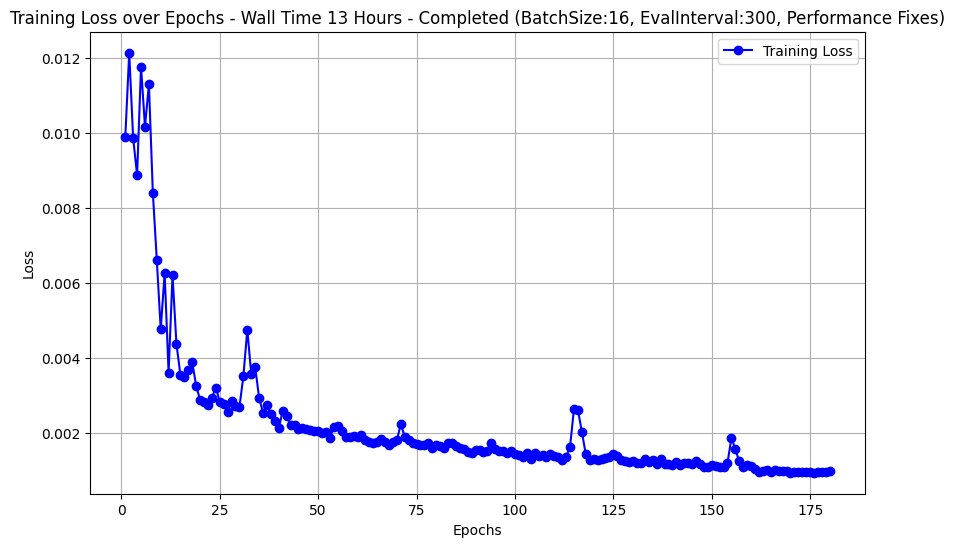

In [4]:
import matplotlib.pyplot as plt

# Data for plotting (epoch training losses)
epochs = list(range(1, 181))

# Plotting the train loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, marker='o', color='b', label='Training Loss')

# Adding labels and title
plt.title('Training Loss over Epochs - Wall Time 13 Hours - Completed (BatchSize:16, EvalInterval:300, Performance Fixes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()